<a href="https://colab.research.google.com/github/yyWnnaa/HelloWorld/blob/main/biLSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install pyupbit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 112 kB 39.8 MB/s 


In [2]:
import numpy as np
import pandas as pd

# 파이토치 라이브러리 호출
import torch 
import matplotlib.pyplot as plt 

import torchvision 
import torchvision.transforms as transforms 

import torch.nn as nn 
import torch.optim as optim

#
import pandas_datareader.data as pdr
import matplotlib.pyplot as plt

import datetime

from torch.autograd import Variable 

from torch.utils.data import Dataset, DataLoader

In [3]:
#데이터 불러오기

import pyupbit
from pyupbit.quotation_api import get_tickers

ETH_price = pyupbit.get_current_price("KRW-ETH")

df_ETH = pyupbit.get_ohlcv("KRW-ETH","hour",1581, to = '20220501')
#220501까지 1581일
#pyupbit.get_ohlcv로 받으면 open, high, low, close, volume거래량, value가 기본으로 있는건지? ->맞는듯

print(df_ETH)

                          open       high        low      close  \
2018-01-01 09:00:00  1028000.0  1076000.0  1011500.0  1057000.0   
2018-01-02 09:00:00  1056500.0  1270500.0  1051000.0  1177000.0   
2018-01-03 09:00:00  1177000.0  1324500.0  1157500.0  1295500.0   
2018-01-04 09:00:00  1295500.0  1518000.0  1269000.0  1439500.0   
2018-01-05 09:00:00  1439500.0  1645000.0  1406500.0  1554500.0   
...                        ...        ...        ...        ...   
2022-04-26 09:00:00  3766000.0  3799000.0  3553000.0  3596000.0   
2022-04-27 09:00:00  3597000.0  3702000.0  3580000.0  3677000.0   
2022-04-28 09:00:00  3677000.0  3786000.0  3646000.0  3737000.0   
2022-04-29 09:00:00  3737000.0  3753000.0  3603000.0  3628000.0   
2022-04-30 09:00:00  3630000.0  3656000.0  3564000.0  3570000.0   

                            volume         value  
2018-01-01 09:00:00   51315.571156  5.381793e+10  
2018-01-02 09:00:00  158481.289301  1.886397e+11  
2018-01-03 09:00:00   83430.944304  1.0099

In [4]:
df_ETH = df_ETH.drop("value",axis=1)
#value는 학습에 쓰는 일이 없어서 먼저 제외

df_ETH = df_ETH.drop(columns='volume')
#이렇게도 삭제 가능

print(df_ETH)

                          open       high        low      close
2018-01-01 09:00:00  1028000.0  1076000.0  1011500.0  1057000.0
2018-01-02 09:00:00  1056500.0  1270500.0  1051000.0  1177000.0
2018-01-03 09:00:00  1177000.0  1324500.0  1157500.0  1295500.0
2018-01-04 09:00:00  1295500.0  1518000.0  1269000.0  1439500.0
2018-01-05 09:00:00  1439500.0  1645000.0  1406500.0  1554500.0
...                        ...        ...        ...        ...
2022-04-26 09:00:00  3766000.0  3799000.0  3553000.0  3596000.0
2022-04-27 09:00:00  3597000.0  3702000.0  3580000.0  3677000.0
2022-04-28 09:00:00  3677000.0  3786000.0  3646000.0  3737000.0
2022-04-29 09:00:00  3737000.0  3753000.0  3603000.0  3628000.0
2022-04-30 09:00:00  3630000.0  3656000.0  3564000.0  3570000.0

[1581 rows x 4 columns]


In [5]:
print(df_ETH.dtypes)

open     float64
high     float64
low      float64
close    float64
dtype: object


In [6]:
#결측치 확인
df_ETH.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [7]:
X = df_ETH
y = df_ETH.iloc[:, 3:4]
#Pandas : iloc[] 를 활용한 인덱싱

print(X)
print(y)

                          open       high        low      close
2018-01-01 09:00:00  1028000.0  1076000.0  1011500.0  1057000.0
2018-01-02 09:00:00  1056500.0  1270500.0  1051000.0  1177000.0
2018-01-03 09:00:00  1177000.0  1324500.0  1157500.0  1295500.0
2018-01-04 09:00:00  1295500.0  1518000.0  1269000.0  1439500.0
2018-01-05 09:00:00  1439500.0  1645000.0  1406500.0  1554500.0
...                        ...        ...        ...        ...
2022-04-26 09:00:00  3766000.0  3799000.0  3553000.0  3596000.0
2022-04-27 09:00:00  3597000.0  3702000.0  3580000.0  3677000.0
2022-04-28 09:00:00  3677000.0  3786000.0  3646000.0  3737000.0
2022-04-29 09:00:00  3737000.0  3753000.0  3603000.0  3628000.0
2022-04-30 09:00:00  3630000.0  3656000.0  3564000.0  3570000.0

[1581 rows x 4 columns]
                         close
2018-01-01 09:00:00  1057000.0
2018-01-02 09:00:00  1177000.0
2018-01-03 09:00:00  1295500.0
2018-01-04 09:00:00  1439500.0
2018-01-05 09:00:00  1554500.0
...                  

In [8]:
#데이터 정규화
"""
학습이 잘되기 위해 데이터 정규화 
StandardScaler	각 특징의 평균을 0, 분산을 1이 되도록 변경
MinMaxScaler	최대/최소값이 각각 1, 0이 되도록 변경
"""

#결과 예측할것에 minmax 쓰는건 대부분 다 똑같아보이는데
# StandardScaler 사용에 대해서는 생각해봐야할듯하네요
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mmsc = MinMaxScaler()
stdsc = StandardScaler()

X_std = stdsc.fit_transform(X)
#X_std = mmsc.fit_transform(X)
y_mm = mmsc.fit_transform(y) 

#SEQUECNE TO SEQUENCE 예제에서 대부분 잘못 알고 계시는것이, Y데이터를 정규화 하고 있다는 것입니다.
#이렇게 된다면 해당 NETWORK는 훈련 검증 테스트 셋에서만 유용한 모델이 되어 버립니다. 
#실제로 우리가 예측하고자 하는 것은 모르는 값일텐데 YEST를 정규화 해버리면 
#이를 DENORMALIZATION해주기 위해 평균과 분산을 훈련셋에서 알아내야 됩니다. 
#그런데 우리가 알고자 하는건 이미 훈련은 다 마친 NETWORK로 YTEST를 예측하기를 원하는 것이죠, 
#그런데 YTEST에 사용될 평균과 표준편차 또는 민맥스 값을 어떻게 알수 있을가요?? 전혀 알수가없겠죠. 
#따라서 수치형 데이터를 이용해 network를 구성함에 있어서 Y데이터를 정규화 하는것은 잘못된 방법입니다. 
#간혹 Y데이터를 정규화하는 예제가 있지만 이는 학습률을 매우 좋게 하기위한 트릭이지 잘못된 방법입니다. 
#추가로 범주형 데이터에서는 정규화에 대한 걱정도 하지 않겠지요 인코딩이라는 좋은 방법이 있기 때문에 
#결론적으로 Y데이터에는 어떠한 정규화도 해서는 안됩니다.

In [9]:
X_train = X_std[:1200, :] #훈련 데이터셋
X_test = X_std[1200:, :] #테스트 데이터셋

# Test Data 
y_train = y_mm[:1200, :]
y_test = y_mm[1200:, :] 

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 


#결과
#Training Shape (1200, 4) (1200, 1)
#Testing Shape (381, 4) (381, 1)

Training Shape (1200, 4) (1200, 1)
Testing Shape (381, 4) (381, 1)


In [10]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_f = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_f.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_f.shape, y_test_tensors.shape) 

Training Shape torch.Size([1200, 1, 4]) torch.Size([1200, 1])
Testing Shape torch.Size([381, 1, 4]) torch.Size([381, 1])


In [11]:
#GPU 준비하기

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")  # device
#cuda = True if torch.cuda.is_available() else False

#Tensor = torch.cuda.FloatTensor if cuda else torch.FloatTensor

In [12]:
class biLSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(biLSTM, self).__init__()
        self.num_classes = num_classes 
        self.num_layers = num_layers 
        self.input_size = input_size 
        self.hidden_size = hidden_size 
        self.seq_length = seq_length 

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, bidirectional=True, batch_first=True) 
        #LSTM 계층을 정의하는 부분(nn.LSTM)에 bidirectional=True 옵션을 사용하면 양방향 LSTM을 사용하겠다는 의미
        #이와 같이 양방향 LSTM은 옵션 변경만으로 손쉽게 구현 가능
        #bidirectional=True 옵션은 양방향 RNN,양방향 GRU 모두에 해당됨

        self.fc =  nn.Linear(hidden_size*2, num_classes) 
        #한 번 학습하는데 두 개의 계층이 필요하기 때문에 LSTM과는 다르게 은닉상태, 셀 상태에 2를 곱하고 마지막 출력층에도 2를 곱해야한다
        self.relu = nn.ReLU()
    
    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size)) 
        c_0 = Variable(torch.zeros(self.num_layers*2, x.size(0), self.hidden_size))                 
        out, _ = self.lstm(x, (h_0, c_0)) 
        out = self.fc(out[:, -1, :])    #마지막 시간(time	step상 마지막 단계)의 은닉 상태     
        out = self.relu(out)
        return out

In [17]:
#네트워크 파라미터 구성하기 

num_epochs = 30000 #에포크 수
learning_rate = 0.00001 #학습률 지정

input_size = 4 #number of features #수정하면서 하기 #입력 데이터셋의 칼럼(feature)개수
hidden_size = 100 #number of features in hidden state #은닉층의 뉴런/유닛 개수
num_layers = 1 #LSTM 계층의 개수

num_classes = 1 #number of output classes #클래스 개수

model = biLSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1]) 

criterion = torch.nn.MSELoss()    
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate) 

In [18]:
for epoch in range(num_epochs):
    outputs = model.forward(X_train_tensors_f) 
    optimizer.zero_grad()  
    loss = criterion(outputs, y_train_tensors)
    loss.backward() 
 
    optimizer.step() 
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.01010
Epoch: 100, loss: 0.00925
Epoch: 200, loss: 0.00846
Epoch: 300, loss: 0.00772
Epoch: 400, loss: 0.00703
Epoch: 500, loss: 0.00638
Epoch: 600, loss: 0.00577
Epoch: 700, loss: 0.00519
Epoch: 800, loss: 0.00465
Epoch: 900, loss: 0.00414
Epoch: 1000, loss: 0.00366
Epoch: 1100, loss: 0.00322
Epoch: 1200, loss: 0.00281
Epoch: 1300, loss: 0.00244
Epoch: 1400, loss: 0.00209
Epoch: 1500, loss: 0.00178
Epoch: 1600, loss: 0.00150
Epoch: 1700, loss: 0.00125
Epoch: 1800, loss: 0.00103
Epoch: 1900, loss: 0.00084
Epoch: 2000, loss: 0.00067
Epoch: 2100, loss: 0.00053
Epoch: 2200, loss: 0.00042
Epoch: 2300, loss: 0.00032
Epoch: 2400, loss: 0.00024
Epoch: 2500, loss: 0.00018
Epoch: 2600, loss: 0.00014
Epoch: 2700, loss: 0.00010
Epoch: 2800, loss: 0.00008
Epoch: 2900, loss: 0.00006
Epoch: 3000, loss: 0.00004
Epoch: 3100, loss: 0.00003
Epoch: 3200, loss: 0.00003
Epoch: 3300, loss: 0.00002
Epoch: 3400, loss: 0.00002
Epoch: 3500, loss: 0.00002
Epoch: 3600, loss: 0.00002
Epoch: 3700, 

In [19]:
df_X_std = stdsc.transform(df_ETH)

df_y_mm = mmsc.transform(df_ETH.iloc[:, 3:4])

df_X_std = Variable(torch.Tensor(df_X_std)) #converting to Tensors
df_y_mm = Variable(torch.Tensor(df_y_mm))

#reshaping the dataset
df_X_std = torch.reshape(df_X_std, (df_X_std.shape[0], 1, df_X_std.shape[1]))

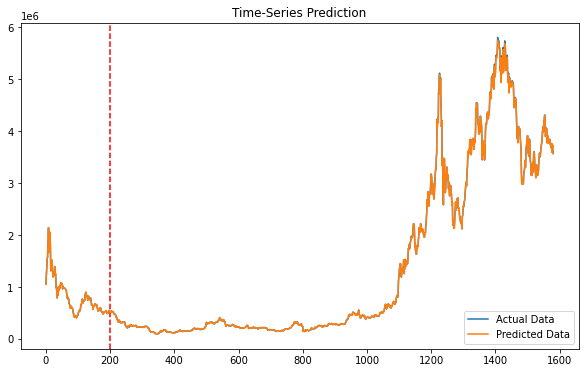

In [21]:
train_predict = model(df_X_std)
predicted = train_predict.data.numpy() 
label_y = df_y_mm.data.numpy()

predicted = mmsc.inverse_transform(predicted) 
label_y = mmsc.inverse_transform(label_y)
plt.figure(figsize=(10,6)) 
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data') 
plt.plot(predicted, label='Predicted Data') 
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 